In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
df=pd.read_csv("E:\Datasets\canada_per_capita_income.csv")
df=pd.DataFrame(df)
df.head()

,year,income
0,1970,3399.299037
1,1971,3768.300000
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [45]:
from sklearn.cluster import KMeans

In [46]:
km=KMeans(n_clusters=8)


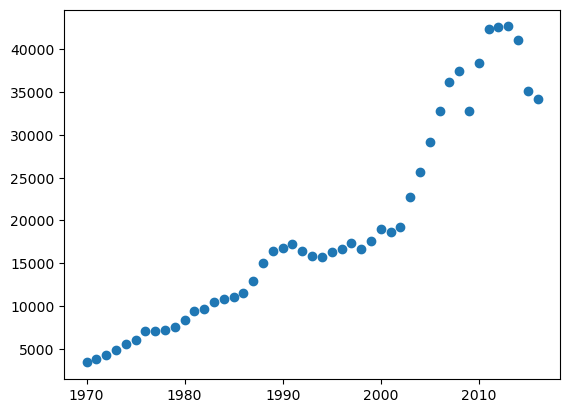

In [47]:
plt.scatter(df.year,df.income)

In [48]:
from sklearn.preprocessing import MinMaxScaler

In [49]:
mms=MinMaxScaler()
mms.fit(df[['year']])
df['year']=mms.transform(df[['year']])
mms.fit(df[['income']])
df['income']=mms.transform(df[['income']])

In [50]:
df.head()

,year,income
0,0.000000,0.000000
1,0.021739,0.009395
2,0.043478,0.021689
3,0.065217,0.035776
4,0.086957,0.055432


In [51]:
pred=km.fit_predict(df[['year','income']])

C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [52]:
pred

array([0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 6, 6, 6, 2, 2, 2,
       2, 2, 2, 2, 2, 7, 7, 7, 7, 7, 7, 4, 4, 4, 1, 1, 1, 1, 1, 5, 5, 5,
       5, 1, 1])

In [53]:
df['cluster']=pred

In [54]:
df.head()

,year,income,cluster
0,0.000000,0.000000,0
1,0.021739,0.009395,0
2,0.043478,0.021689,0
3,0.065217,0.035776,0
4,0.086957,0.055432,0


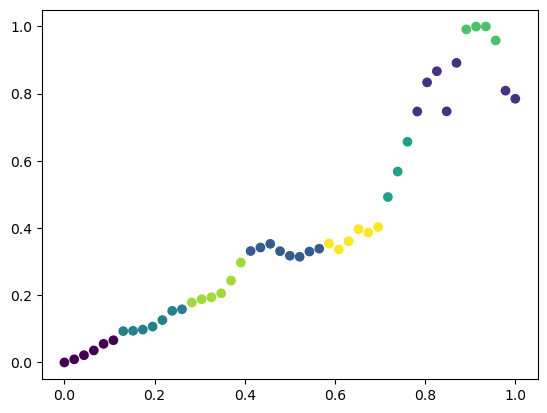

In [55]:
plt.scatter(df['year'],df['income'],c=df['cluster'])
plt.show()

In [56]:
centroid=km.cluster_centers_

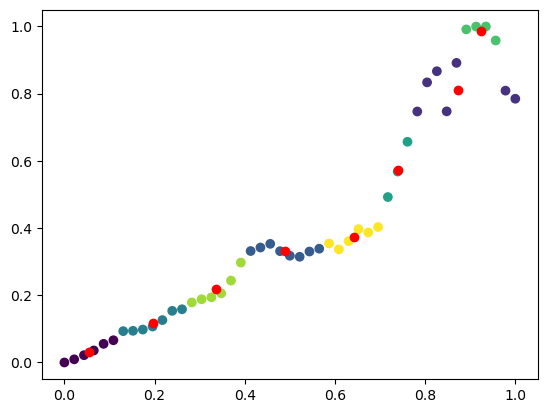

In [57]:
plt.scatter(df['year'],df['income'],c=df['cluster'])
plt.scatter(centroid[:,0],centroid[:,1],color='r')
plt.show()

In [58]:
km.inertia_

0.1605745057639657

In [59]:
mme=[]
ran=range(1,20)
for k in ran:
    kmm=KMeans(n_clusters=k)
    kmm.fit_predict(df[['year','income']])
    mme.append(kmm.inertia_)

C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\91831\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

In [38]:
mme

[8.40559170712416,
 2.400053957198553,
 0.7942912692989421,
 0.5391822518020624,
 0.3744547570460939,
 0.2661296561351265,
 0.20365900283833108,
 0.1560096183232807,
 0.11618873988877619,
 0.09571849361333763,
 0.07653390295170422,
 0.062265592757340026,
 0.05319890362534455,
 0.04405441252630234,
 0.037824106749142654,
 0.0344922937063376,
 0.02944156231500266,
 0.027693852591338632,
 0.023658219246534624]

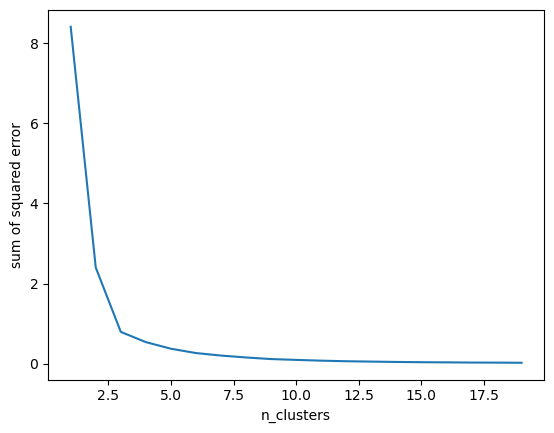

In [41]:
plt.xlabel("n_clusters")
plt.ylabel('sum of squared error')
plt.plot(ran,mme)
plt.show()